In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

import os
import sys
import random

import antares_client
# set random seed for consistent results
import random
random.seed(0)

plt.style.use('fig_publication.mplstyle')
%config InlineBackend.figure_format = 'retina'  #for MacOS, make plots crisp

In [2]:
#dataset_bank_tns_df = pd.read_csv('../dataframes/dataset_bank_90k_tns_df.csv', index_col='ztf_object_id')
#dataset_bank_tns_df = pd.read_csv('../dataframes/dataset_bank_tns_df_SMOTE_train_test_90-10.csv.gz', compression='gzip', index_col='ztf_object_id')
#dataset_bank_tns_df = pd.read_csv('../dataframes/dataset_bank_tns_df_SMOTE_train_test_85-15.csv.gz', compression='gzip', index_col='ztf_object_id')
#dataset_bank_tns_df = pd.read_csv('../dataframes/dataset_bank_tns_df_SMOTE_train_test_80-20.csv.gz', compression='gzip', index_col='ztf_object_id')
#dataset_bank_tns_df = pd.read_csv('../dataframes/dataset_bank_tns_df_SMOTE_train_test_80-20_v2.csv.gz', compression='gzip', index_col='ztf_object_id')

#dataset_bank_tns_df = pd.read_csv('../dataframes/dataset_bank_tns_df_SMOTE_train_test_80-20_addJiterNorm0p1.csv.gz', compression='gzip', index_col='ztf_object_id')
#dataset_bank_tns_df = pd.read_csv('../dataframes/dataset_bank_tns_df_SMOTE_train_test_80-20_addJiterNorm0p05.csv.gz', compression='gzip', index_col='ztf_object_id')
#dataset_bank_tns_df = pd.read_csv('../dataframes/dataset_bank_tns_df_SMOTE_train_test_80-20_addJiterNorm0p02.csv.gz', compression='gzip', index_col='ztf_object_id')
#dataset_bank_tns_df = pd.read_csv('../dataframes/dataset_bank_tns_df_SMOTE_train_test_80-20_addJiterNorm0p01.csv.gz', compression='gzip', index_col='ztf_object_id')

smote_suffix = 'SMOTE_train_test_70-30_min14_kneighbors8'
#smote_suffix = 'SMOTE_train_test_70-30_min4_kneighbors2'
#smote_suffix = 'SMOTE_train_test_60-40_min8_kneighbors4'
#smote_suffix = 'SMOTE_train_test_70-30_min8_kneighbors5'

#smote_suffix = 'SMOTE_train_test_80-20_min4_kneighbors2'
#smote_suffix = 'SMOTE_train_test_80-20_min8_kneighbors5'
#smote_suffix = 'SMOTE_train_test_80-20_min8_kneighbors5_addJitterNorm0p01' # 
#smote_suffix = 'SMOTE_train_test_80-20_min8_kneighbors5_addJitterNorm0p02' # adding jitter makes everything rec a None or Ia (maybe only jitter minority classes? -- too hard)
dataset_bank_tns_df = pd.read_csv(f'../loci_dbs/alerce_cut/dataset_bank_tns_df_{smote_suffix}.csv.gz', compression='gzip', index_col='ztf_object_id')

In [3]:
from collections import Counter
Counter(dataset_bank_tns_df.tns_cls)

Counter({'None': 3816,
         'SN Ia': 2977,
         'SN II': 2724,
         'SN Ib': 2662,
         'SN IIP': 2661,
         'TDE': 2664,
         'SN IIn': 2671,
         'SLSN-II': 2659,
         'SN IIb': 2662,
         'SN Ic': 2665,
         'SN Ic-BL': 2661,
         'SN Ia-91T-like': 2665})

In [4]:
dataset_bank_tns_df = dataset_bank_tns_df.iloc[:, 0:120]
dataset_bank_tns_df

,feature_amplitude_magn_r,feature_anderson_darling_normal_magn_r,feature_beyond_1_std_magn_r,feature_beyond_2_std_magn_r,feature_cusum_magn_r,feature_inter_percentile_range_2_magn_r,feature_inter_percentile_range_10_magn_r,feature_inter_percentile_range_25_magn_r,feature_kurtosis_magn_r,feature_linear_fit_slope_magn_r,...,yKronRad,yExtNSigma,i-z,gApMag_gKronMag,rApMag_rKronMag,iApMag_iKronMag,zApMag_zKronMag,yApMag_yKronMag,7DCD,dist/DLR
ztf_object_id,,,,,,,,,,,,,,,,,,,,,
ZTF19abvhaqq,0.391695,0.368108,0.375000,0.000000,0.395856,0.783390,0.723513,0.435022,-0.830757,0.000424,...,5.58494,27.470400,0.085699,0.293200,0.493101,0.594500,0.698700,0.587200,43.259193,0.629409
ZTF21aaswtkh,0.356501,0.355052,0.300000,0.000000,0.321765,0.713001,0.551514,0.300600,0.231450,0.000459,...,2.17671,4.803750,0.212399,-0.049500,-0.026499,-0.157400,-0.083000,-0.157801,8.971037,0.034890
ZTF18abscghc,0.224128,0.290376,0.400000,0.000000,0.345730,0.448256,0.448256,0.169133,2.276334,0.003358,...,6.30388,27.342800,0.059700,0.620701,0.446798,0.523201,0.552601,0.673201,2.667939,0.236800
ZTF21abjpjcn,0.392974,0.806768,0.142857,0.142857,0.316430,0.785948,0.671357,0.204642,4.390367,-0.040870,...,2.79350,6.980380,0.130800,-0.044300,-0.050900,0.008600,-0.069901,0.001501,14.958282,0.031570
ZTF21aarhzdh,0.908470,0.317764,0.263158,0.000000,0.397708,1.816940,1.555440,0.847626,-0.448936,0.021725,...,6.41716,28.099199,0.218201,0.604300,0.554300,0.658100,0.554300,0.594801,22.116211,1.116821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTF20acupxyy,0.630460,1.074418,0.400000,0.000000,0.457814,1.260920,1.047050,0.832848,-1.744178,0.027233,...,2.19106,4.889630,0.386299,-0.099001,-0.096199,-0.062302,-0.075001,-0.101900,14.188714,2.588904
ZTF21aarzxnb,0.121910,0.562210,0.142857,0.000000,0.376162,0.243820,0.218541,0.099431,1.578408,0.012642,...,3.00144,7.852450,0.018002,0.057100,0.172100,0.201801,-0.015202,-0.012701,0.801429,0.175727
ZTF18acsxjhc,0.926579,1.119445,0.303797,0.037975,0.349061,1.801871,1.069640,0.539695,-0.012415,0.001636,...,11.19340,16.543600,0.225300,0.840199,0.748601,0.825200,0.762100,0.754800,42.918356,0.008771


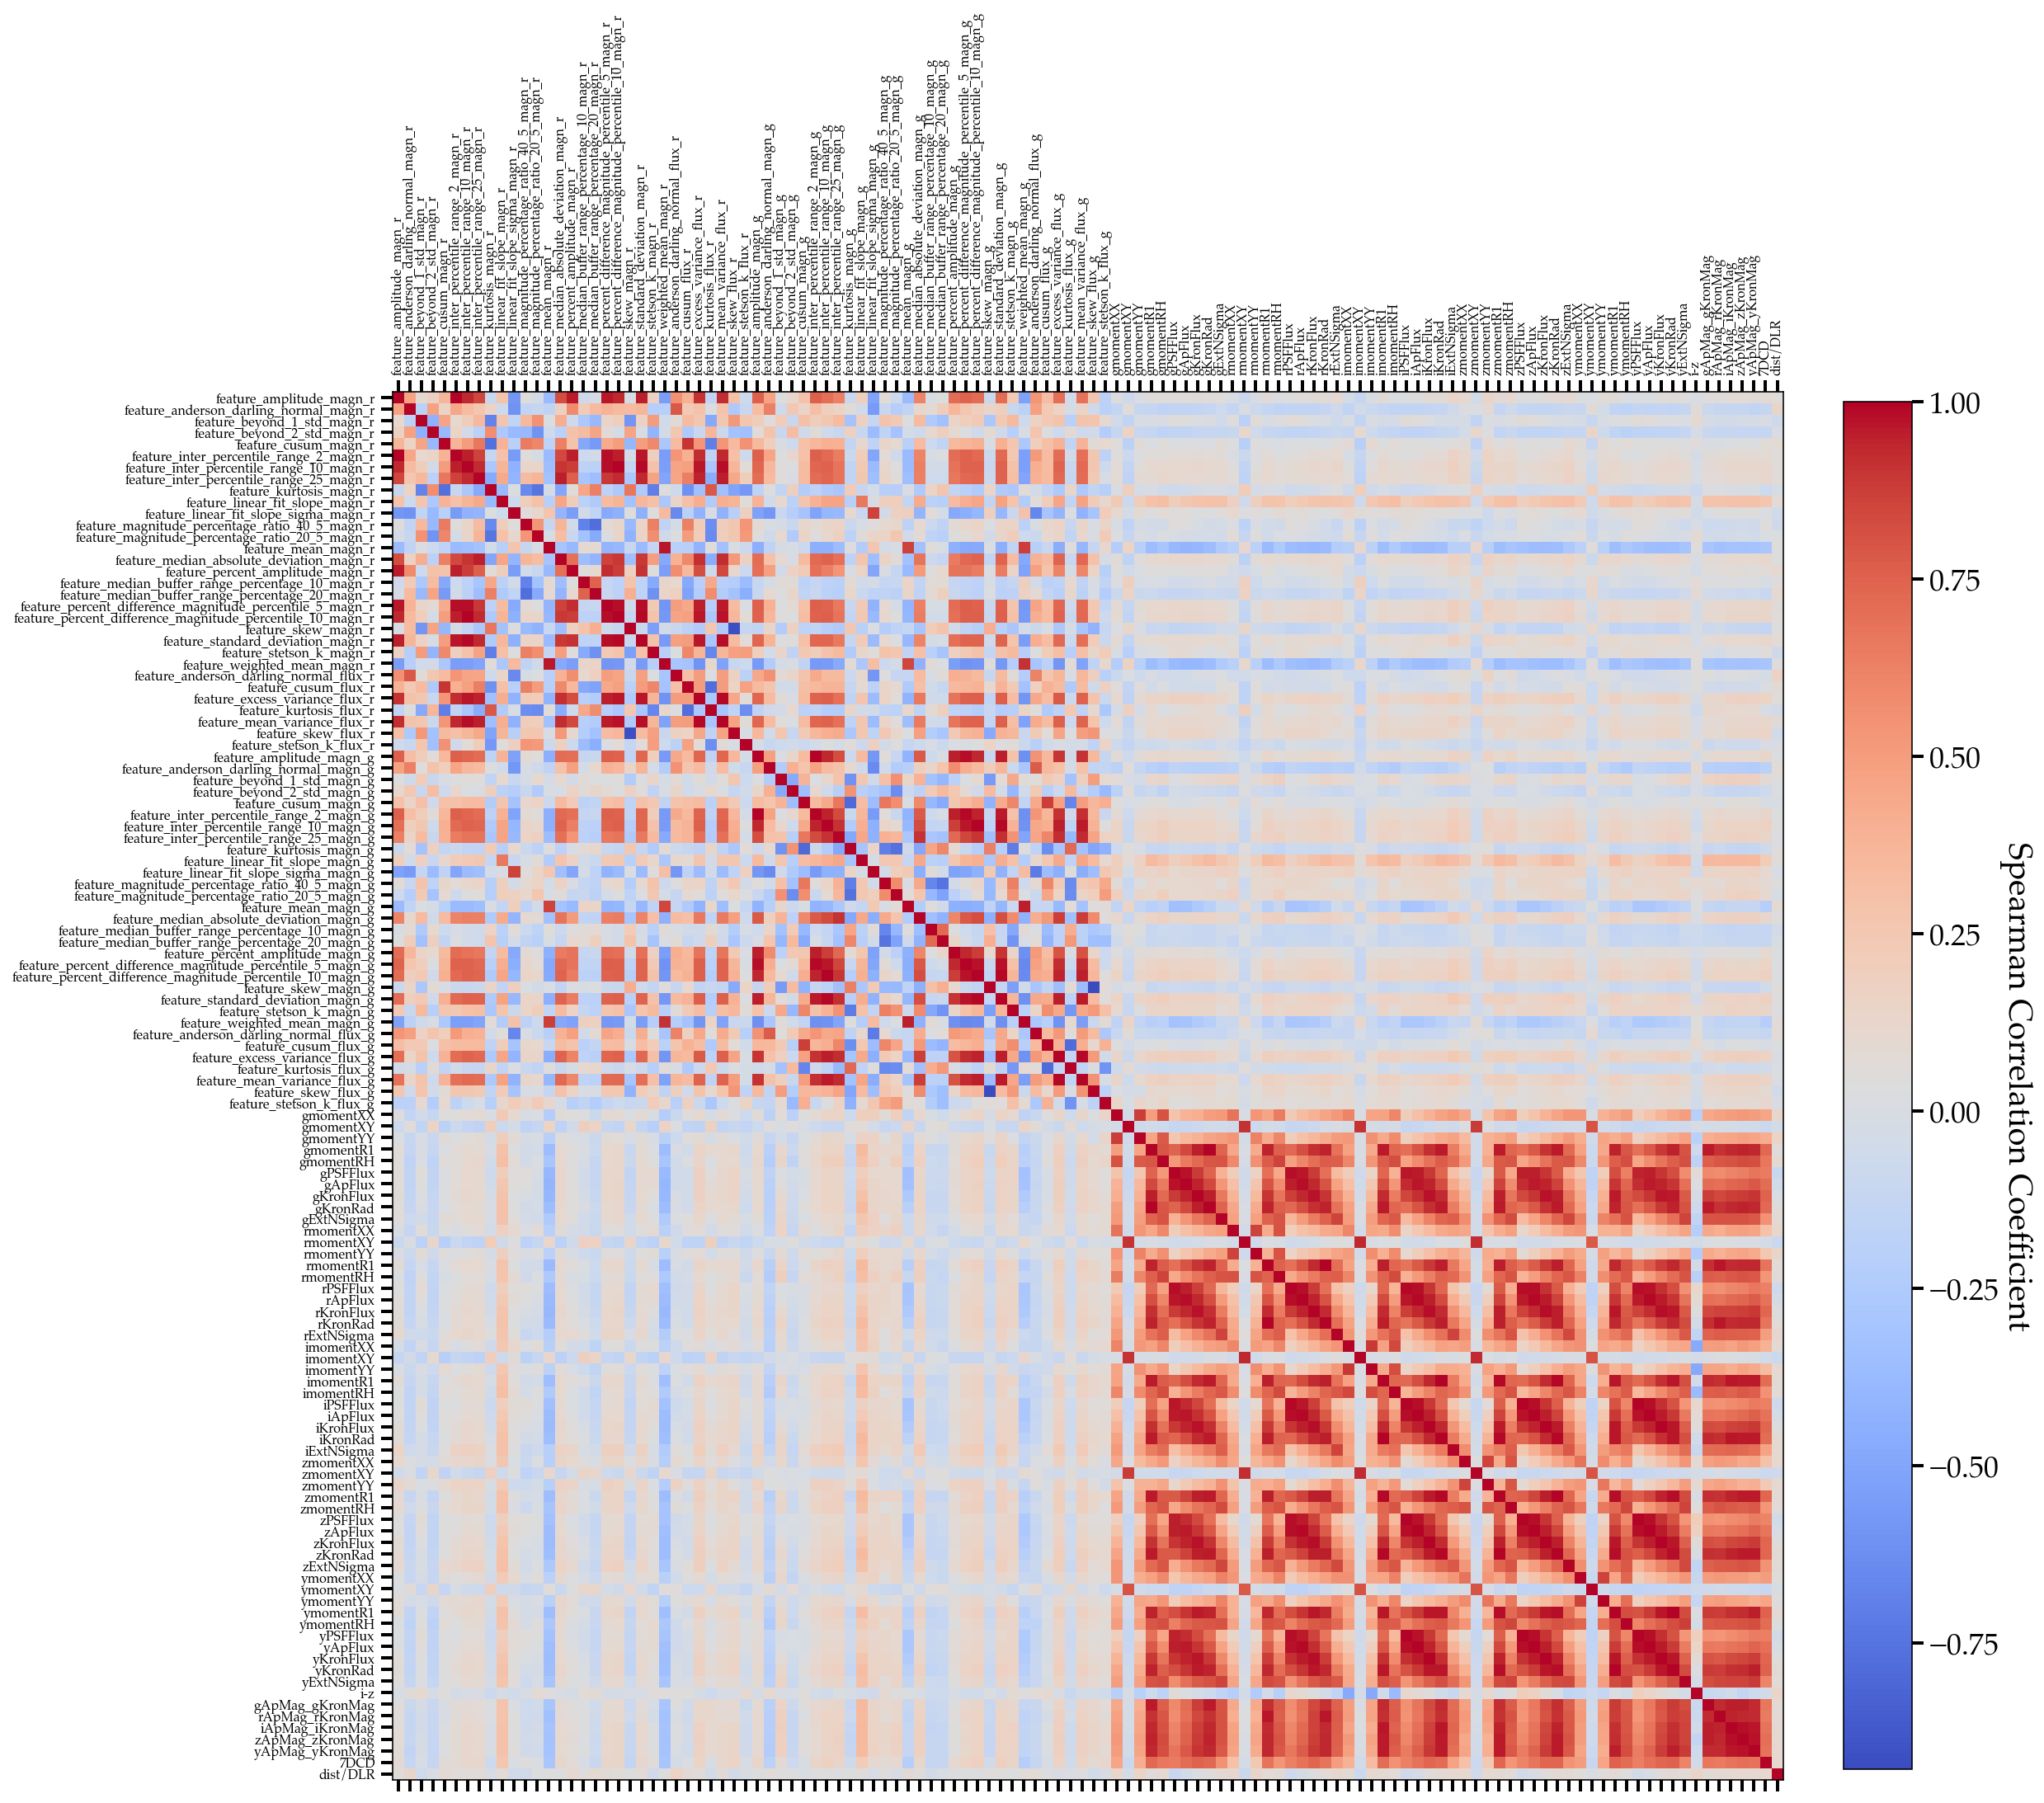

In [5]:
correlation_matrix = dataset_bank_tns_df.corr(method='spearman', )

fig, ax = plt.subplots(figsize=(17, 15))

cax = ax.matshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

# Add colorbar
cbar = plt.colorbar(cax, fraction=0.045, pad=0.04)
cbar.set_label('Spearman Correlation Coefficient', rotation=270, labelpad=20)

# Display feature names on both axes
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, fontsize=8)
ax.set_yticklabels(correlation_matrix.columns, fontsize=8)

plt.tight_layout(pad=0.02)

# Save or show the plot
#plt.savefig(f'../figures/correlation/dataset_bank_tns_df_{smote_suffix}_correlation_matrix.pdf', 
#            dpi=300, bbox_inches='tight', pad_inches=0.02)
plt.show()

In [6]:
dataset_bank_tns_df_no_sims = dataset_bank_tns_df[~dataset_bank_tns_df.index.str.startswith("ZTFabc")]
dataset_bank_tns_df_no_sims

,feature_amplitude_magn_r,feature_anderson_darling_normal_magn_r,feature_beyond_1_std_magn_r,feature_beyond_2_std_magn_r,feature_cusum_magn_r,feature_inter_percentile_range_2_magn_r,feature_inter_percentile_range_10_magn_r,feature_inter_percentile_range_25_magn_r,feature_kurtosis_magn_r,feature_linear_fit_slope_magn_r,...,yKronRad,yExtNSigma,i-z,gApMag_gKronMag,rApMag_rKronMag,iApMag_iKronMag,zApMag_zKronMag,yApMag_yKronMag,7DCD,dist/DLR
ztf_object_id,,,,,,,,,,,,,,,,,,,,,
ZTF19abvhaqq,0.391695,0.368108,0.375000,0.000000,0.395856,0.783390,0.723513,0.435022,-0.830757,0.000424,...,5.58494,27.470400,0.085699,0.293200,0.493101,0.594500,0.698700,0.587200,43.259193,0.629409
ZTF21aaswtkh,0.356501,0.355052,0.300000,0.000000,0.321765,0.713001,0.551514,0.300600,0.231450,0.000459,...,2.17671,4.803750,0.212399,-0.049500,-0.026499,-0.157400,-0.083000,-0.157801,8.971037,0.034890
ZTF18abscghc,0.224128,0.290376,0.400000,0.000000,0.345730,0.448256,0.448256,0.169133,2.276334,0.003358,...,6.30388,27.342800,0.059700,0.620701,0.446798,0.523201,0.552601,0.673201,2.667939,0.236800
ZTF21abjpjcn,0.392974,0.806768,0.142857,0.142857,0.316430,0.785948,0.671357,0.204642,4.390367,-0.040870,...,2.79350,6.980380,0.130800,-0.044300,-0.050900,0.008600,-0.069901,0.001501,14.958282,0.031570
ZTF21aarhzdh,0.908470,0.317764,0.263158,0.000000,0.397708,1.816940,1.555440,0.847626,-0.448936,0.021725,...,6.41716,28.099199,0.218201,0.604300,0.554300,0.658100,0.554300,0.594801,22.116211,1.116821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTF20acupxyy,0.630460,1.074418,0.400000,0.000000,0.457814,1.260920,1.047050,0.832848,-1.744178,0.027233,...,2.19106,4.889630,0.386299,-0.099001,-0.096199,-0.062302,-0.075001,-0.101900,14.188714,2.588904
ZTF21aarzxnb,0.121910,0.562210,0.142857,0.000000,0.376162,0.243820,0.218541,0.099431,1.578408,0.012642,...,3.00144,7.852450,0.018002,0.057100,0.172100,0.201801,-0.015202,-0.012701,0.801429,0.175727
ZTF18acsxjhc,0.926579,1.119445,0.303797,0.037975,0.349061,1.801871,1.069640,0.539695,-0.012415,0.001636,...,11.19340,16.543600,0.225300,0.840199,0.748601,0.825200,0.762100,0.754800,42.918356,0.008771


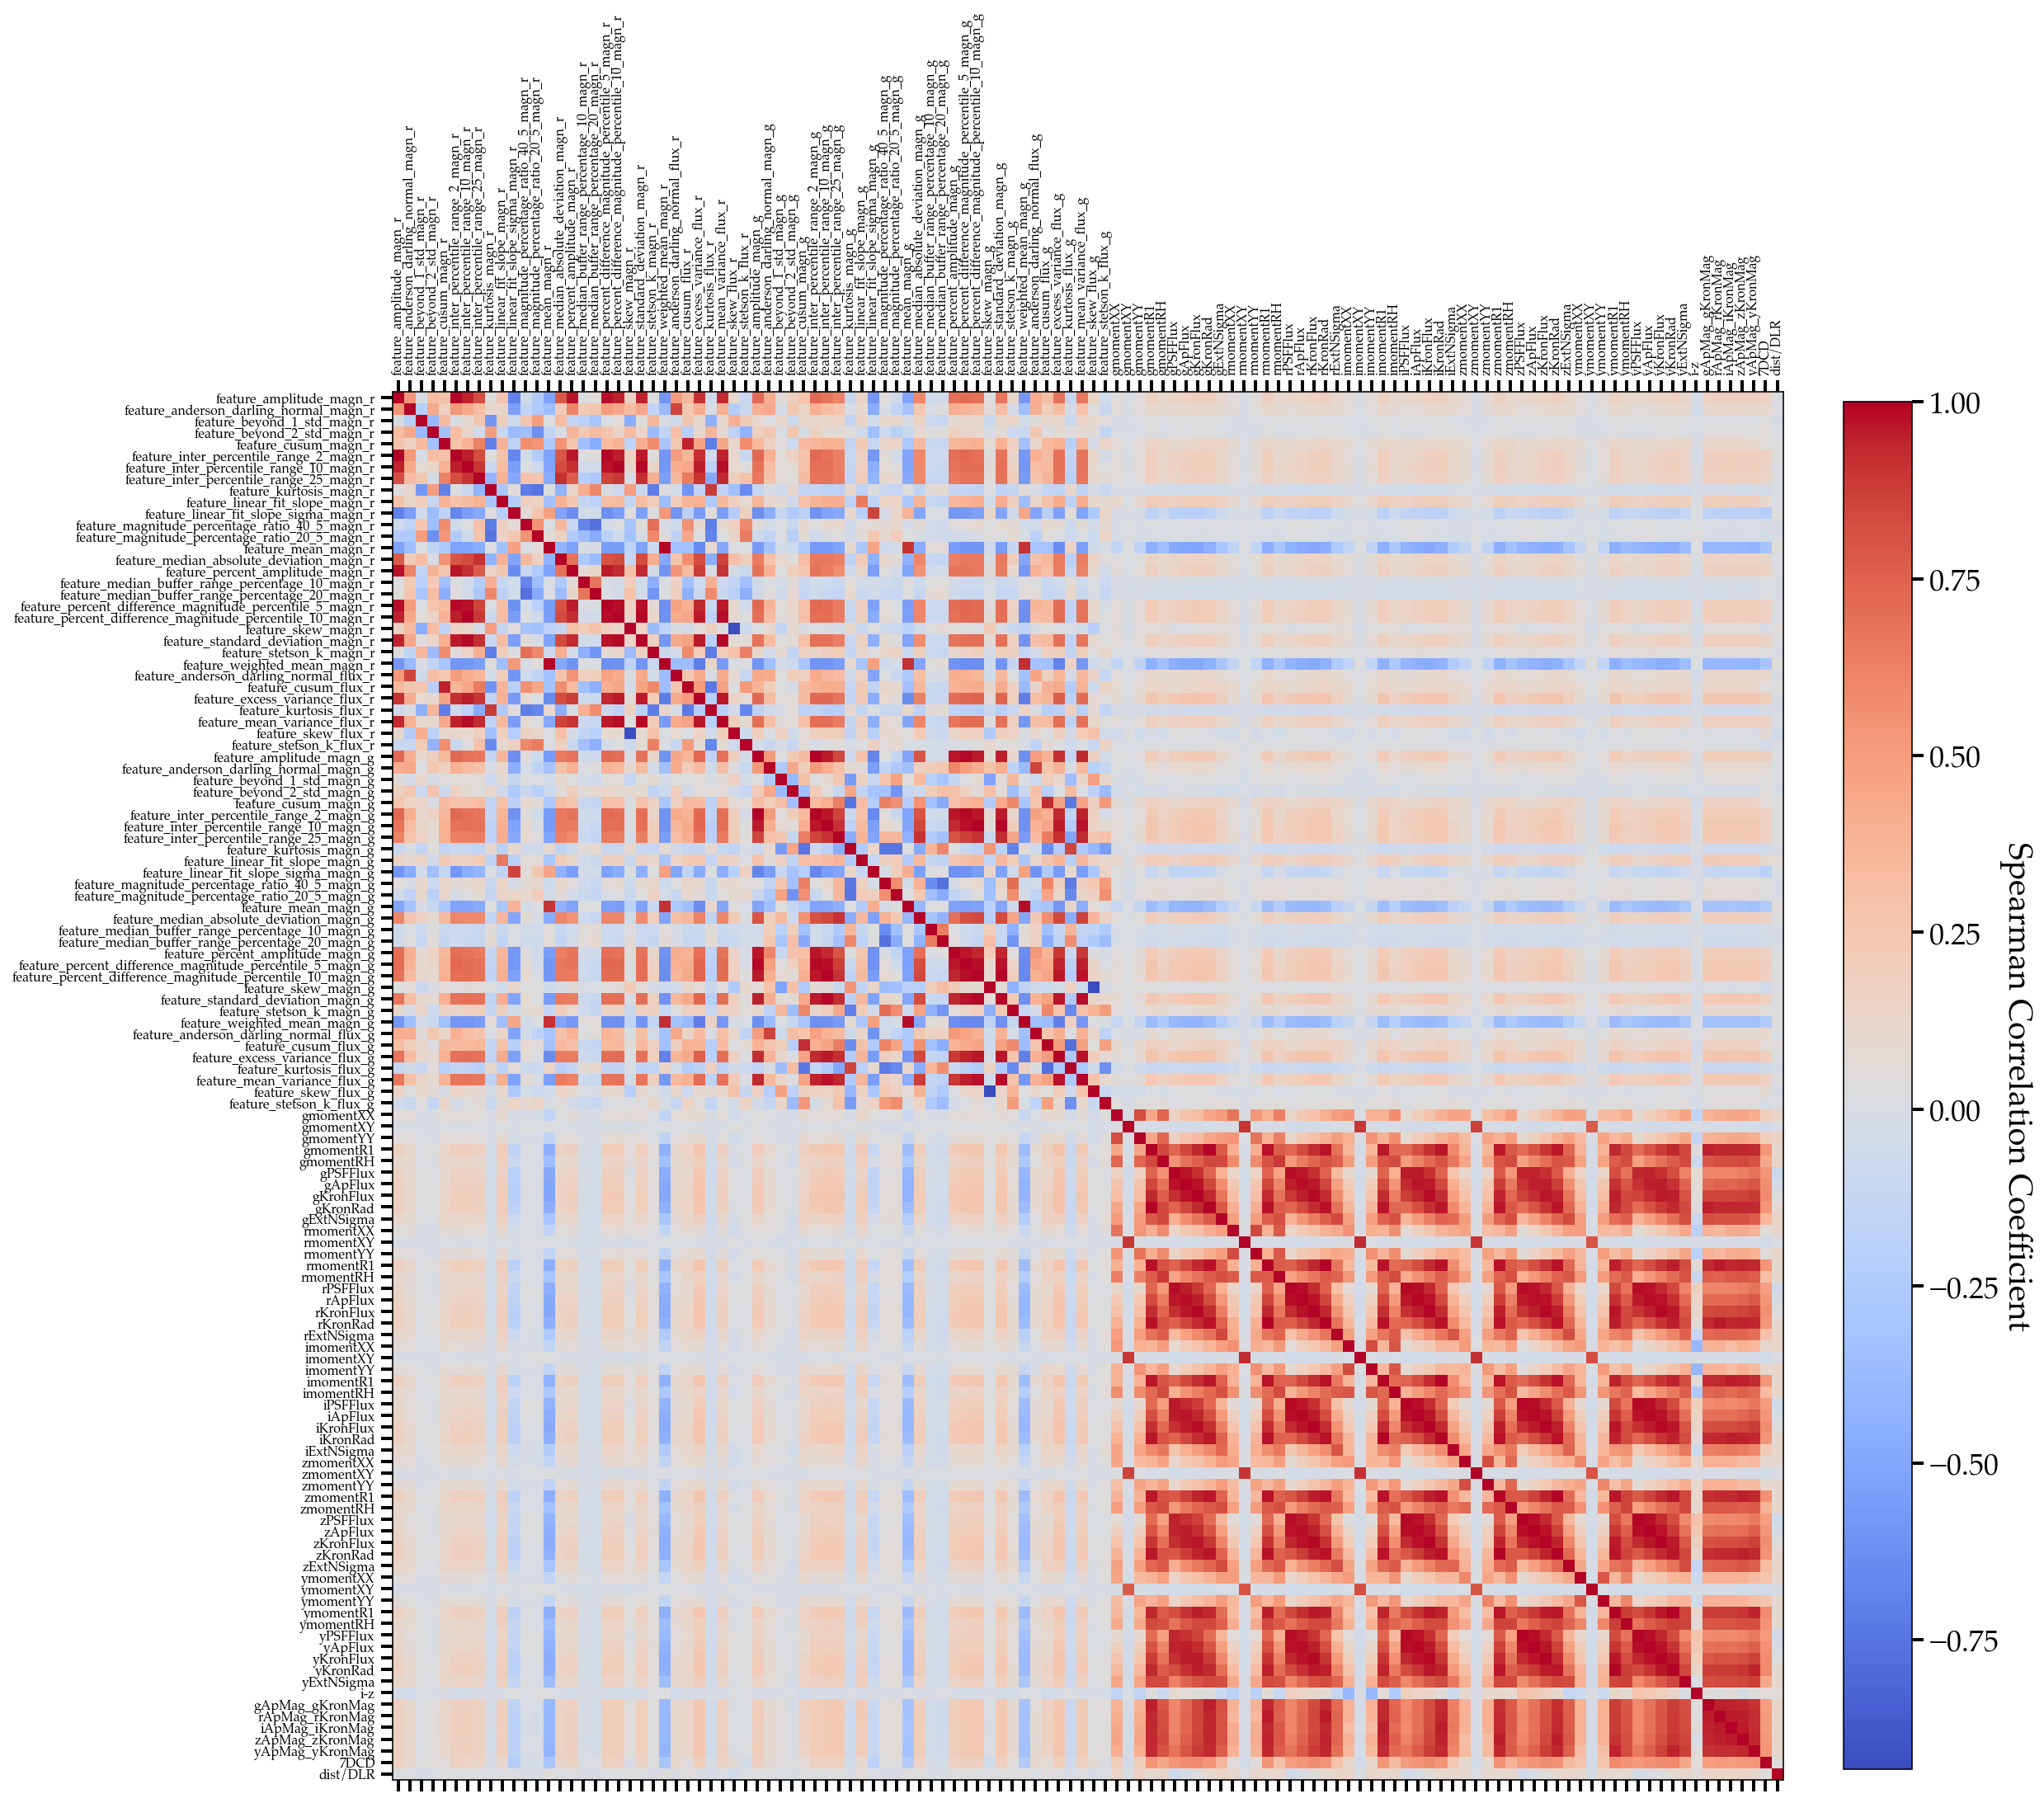

In [7]:
correlation_matrix = dataset_bank_tns_df_no_sims.corr(method='spearman', )

fig, ax = plt.subplots(figsize=(17, 15))

cax = ax.matshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

# Add colorbar
cbar = plt.colorbar(cax, fraction=0.045, pad=0.04)
cbar.set_label('Spearman Correlation Coefficient', rotation=270, labelpad=20)

# Display feature names on both axes
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, fontsize=8)
ax.set_yticklabels(correlation_matrix.columns, fontsize=8)

plt.tight_layout(pad=0.02)

# Save or show the plot
plt.savefig(f'../figures/correlation/dataset_bank_tns_df_{smote_suffix}_correlation_matrix.pdf', 
            dpi=300, bbox_inches='tight', pad_inches=0.02)
plt.show()

# TODO: make matrix of mean features (anom - not anom)

In [80]:
df = pd.read_csv('../tables/test_set_after_vetting.csv', index_col=0)
df = df[df['7DCD'] <= 500] # some bad outliers

anom_df = df[df.true_labels_av == 1].iloc[:, 0:120]
norm_df = df[df.true_labels_av == 0].iloc[:, 0:120]

In [85]:
len(df)

449

In [91]:
np.mean(anom_df['7DCD'])

71.16569412384145

In [92]:
np.mean(norm_df['7DCD'])

68.42465041993631

(array([33., 10.,  6.,  4.,  2.,  0.,  4.,  0.,  2.,  2.]),
 array([  2.98057182,  36.74738242,  70.51419301, 104.2810036 ,
        138.04781419, 171.81462478, 205.58143538, 239.34824597,
        273.11505656, 306.88186715, 340.64867775]),
 <BarContainer object of 10 artists>)

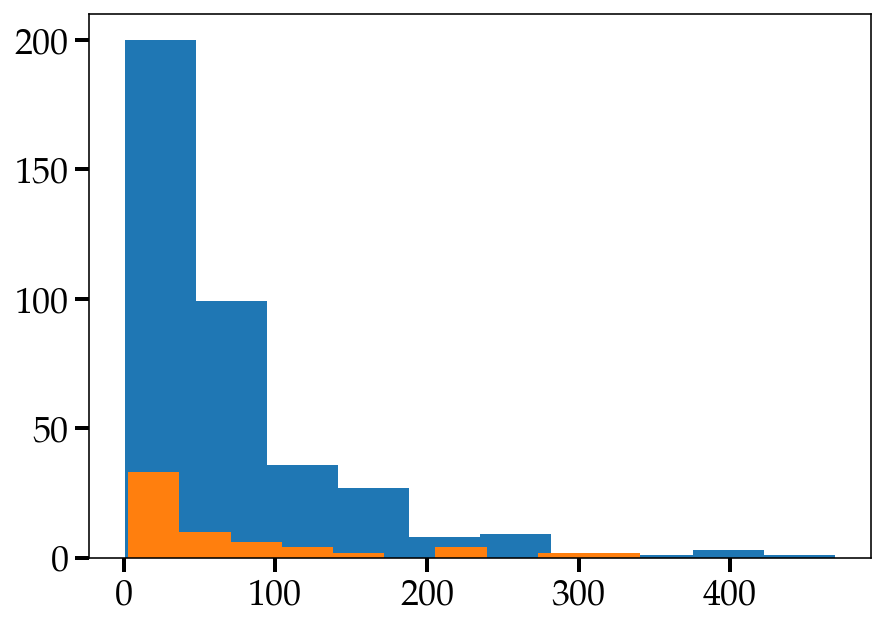

In [86]:
plt.hist(norm_df['7DCD'])
plt.hist(anom_df['7DCD'])

In [87]:
anom_df

,feature_amplitude_magn_r,feature_anderson_darling_normal_magn_r,feature_beyond_1_std_magn_r,feature_beyond_2_std_magn_r,feature_cusum_magn_r,feature_inter_percentile_range_2_magn_r,feature_inter_percentile_range_10_magn_r,feature_inter_percentile_range_25_magn_r,feature_kurtosis_magn_r,feature_linear_fit_slope_magn_r,...,yKronRad,yExtNSigma,i-z,gApMag_gKronMag,rApMag_rKronMag,iApMag_iKronMag,zApMag_zKronMag,yApMag_yKronMag,7DCD,dist/DLR
ztf_object_id,,,,,,,,,,,,,,,,,,,,,
ZTF21acgxypn,0.541942,0.743175,0.200000,0.000000,0.395337,1.083883,0.948133,0.494123,0.236500,0.001268,...,15.09690,41.370300,0.145802,1.799901,1.987599,2.187201,1.923100,1.677900,127.987642,1.280643
ZTF21abgkfzh,0.441565,0.789434,0.294118,0.088235,0.396573,0.869656,0.599177,0.282619,0.081786,0.004576,...,3.21152,15.931000,0.033300,0.313499,0.529100,0.456400,0.356501,0.303902,3.713982,0.682704
ZTF21abotose,0.565050,0.552988,0.461538,0.000000,0.422135,1.130100,1.023060,0.725770,-1.557476,0.011501,...,3.67598,10.039600,0.206202,0.015600,0.044500,0.097502,0.026999,0.017200,16.422863,0.073413
ZTF21achfddh,0.214568,0.669495,0.300000,0.100000,0.339219,0.429136,0.365028,0.088690,0.927231,-0.006957,...,12.05590,35.422798,0.068100,1.307600,1.514101,1.475599,1.543099,1.497299,160.902328,0.685500
ZTF22aaagrce,0.173291,0.274762,0.400000,0.000000,0.414536,0.346582,0.346582,0.217487,-1.435718,0.039288,...,2.57025,14.753000,0.218399,-0.021801,0.000599,0.175699,0.022200,0.017900,16.078332,4.815952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTF21aaxvcmj,0.531418,0.740801,0.466667,0.000000,0.440747,1.062836,0.825193,0.670888,-1.505328,0.020808,...,4.84229,20.612000,0.148600,0.612799,0.649399,0.898399,0.735699,0.480301,26.594475,0.202760
ZTF20abqlmwn,0.906152,2.573259,0.467742,0.000000,0.444840,1.788699,1.441542,1.128241,-1.385934,0.008149,...,14.01900,38.172001,0.067301,1.743700,1.929601,2.057899,1.280699,1.710000,206.788111,0.936385
ZTF21acqvuyb,0.723663,0.435419,0.166667,0.000000,0.397916,1.447327,1.379396,0.768021,0.520060,-0.008838,...,2.77553,13.187900,0.258902,0.071001,0.129601,0.191301,0.107300,-0.085899,14.138512,4.232806


In [88]:
mean_arr = np.mean(anom_df).values - np.mean(norm_df).values
mean_arr = mean_arr.reshape(-1, 120)
mean_df = pd.DataFrame(mean_arr, columns=anom_df.columns)
mean_df

,feature_amplitude_magn_r,feature_anderson_darling_normal_magn_r,feature_beyond_1_std_magn_r,feature_beyond_2_std_magn_r,feature_cusum_magn_r,feature_inter_percentile_range_2_magn_r,feature_inter_percentile_range_10_magn_r,feature_inter_percentile_range_25_magn_r,feature_kurtosis_magn_r,feature_linear_fit_slope_magn_r,...,yKronRad,yExtNSigma,i-z,gApMag_gKronMag,rApMag_rKronMag,iApMag_iKronMag,zApMag_zKronMag,yApMag_yKronMag,7DCD,dist/DLR
0,0.044107,0.580934,-0.011996,0.001744,0.000525,0.070488,0.053034,0.035111,-0.136161,-0.004682,...,0.330328,-1.093127,-0.010466,-0.010414,0.011401,0.033046,0.000432,0.009647,2.741044,0.0624


In [89]:
range(len(np.mean(anom_df).values - np.mean(norm_df).values))

range(0, 120)

Text(0, 0.5, 'Vetted Mean Anomaly Feature - Mean Non-Anomaly Feature')

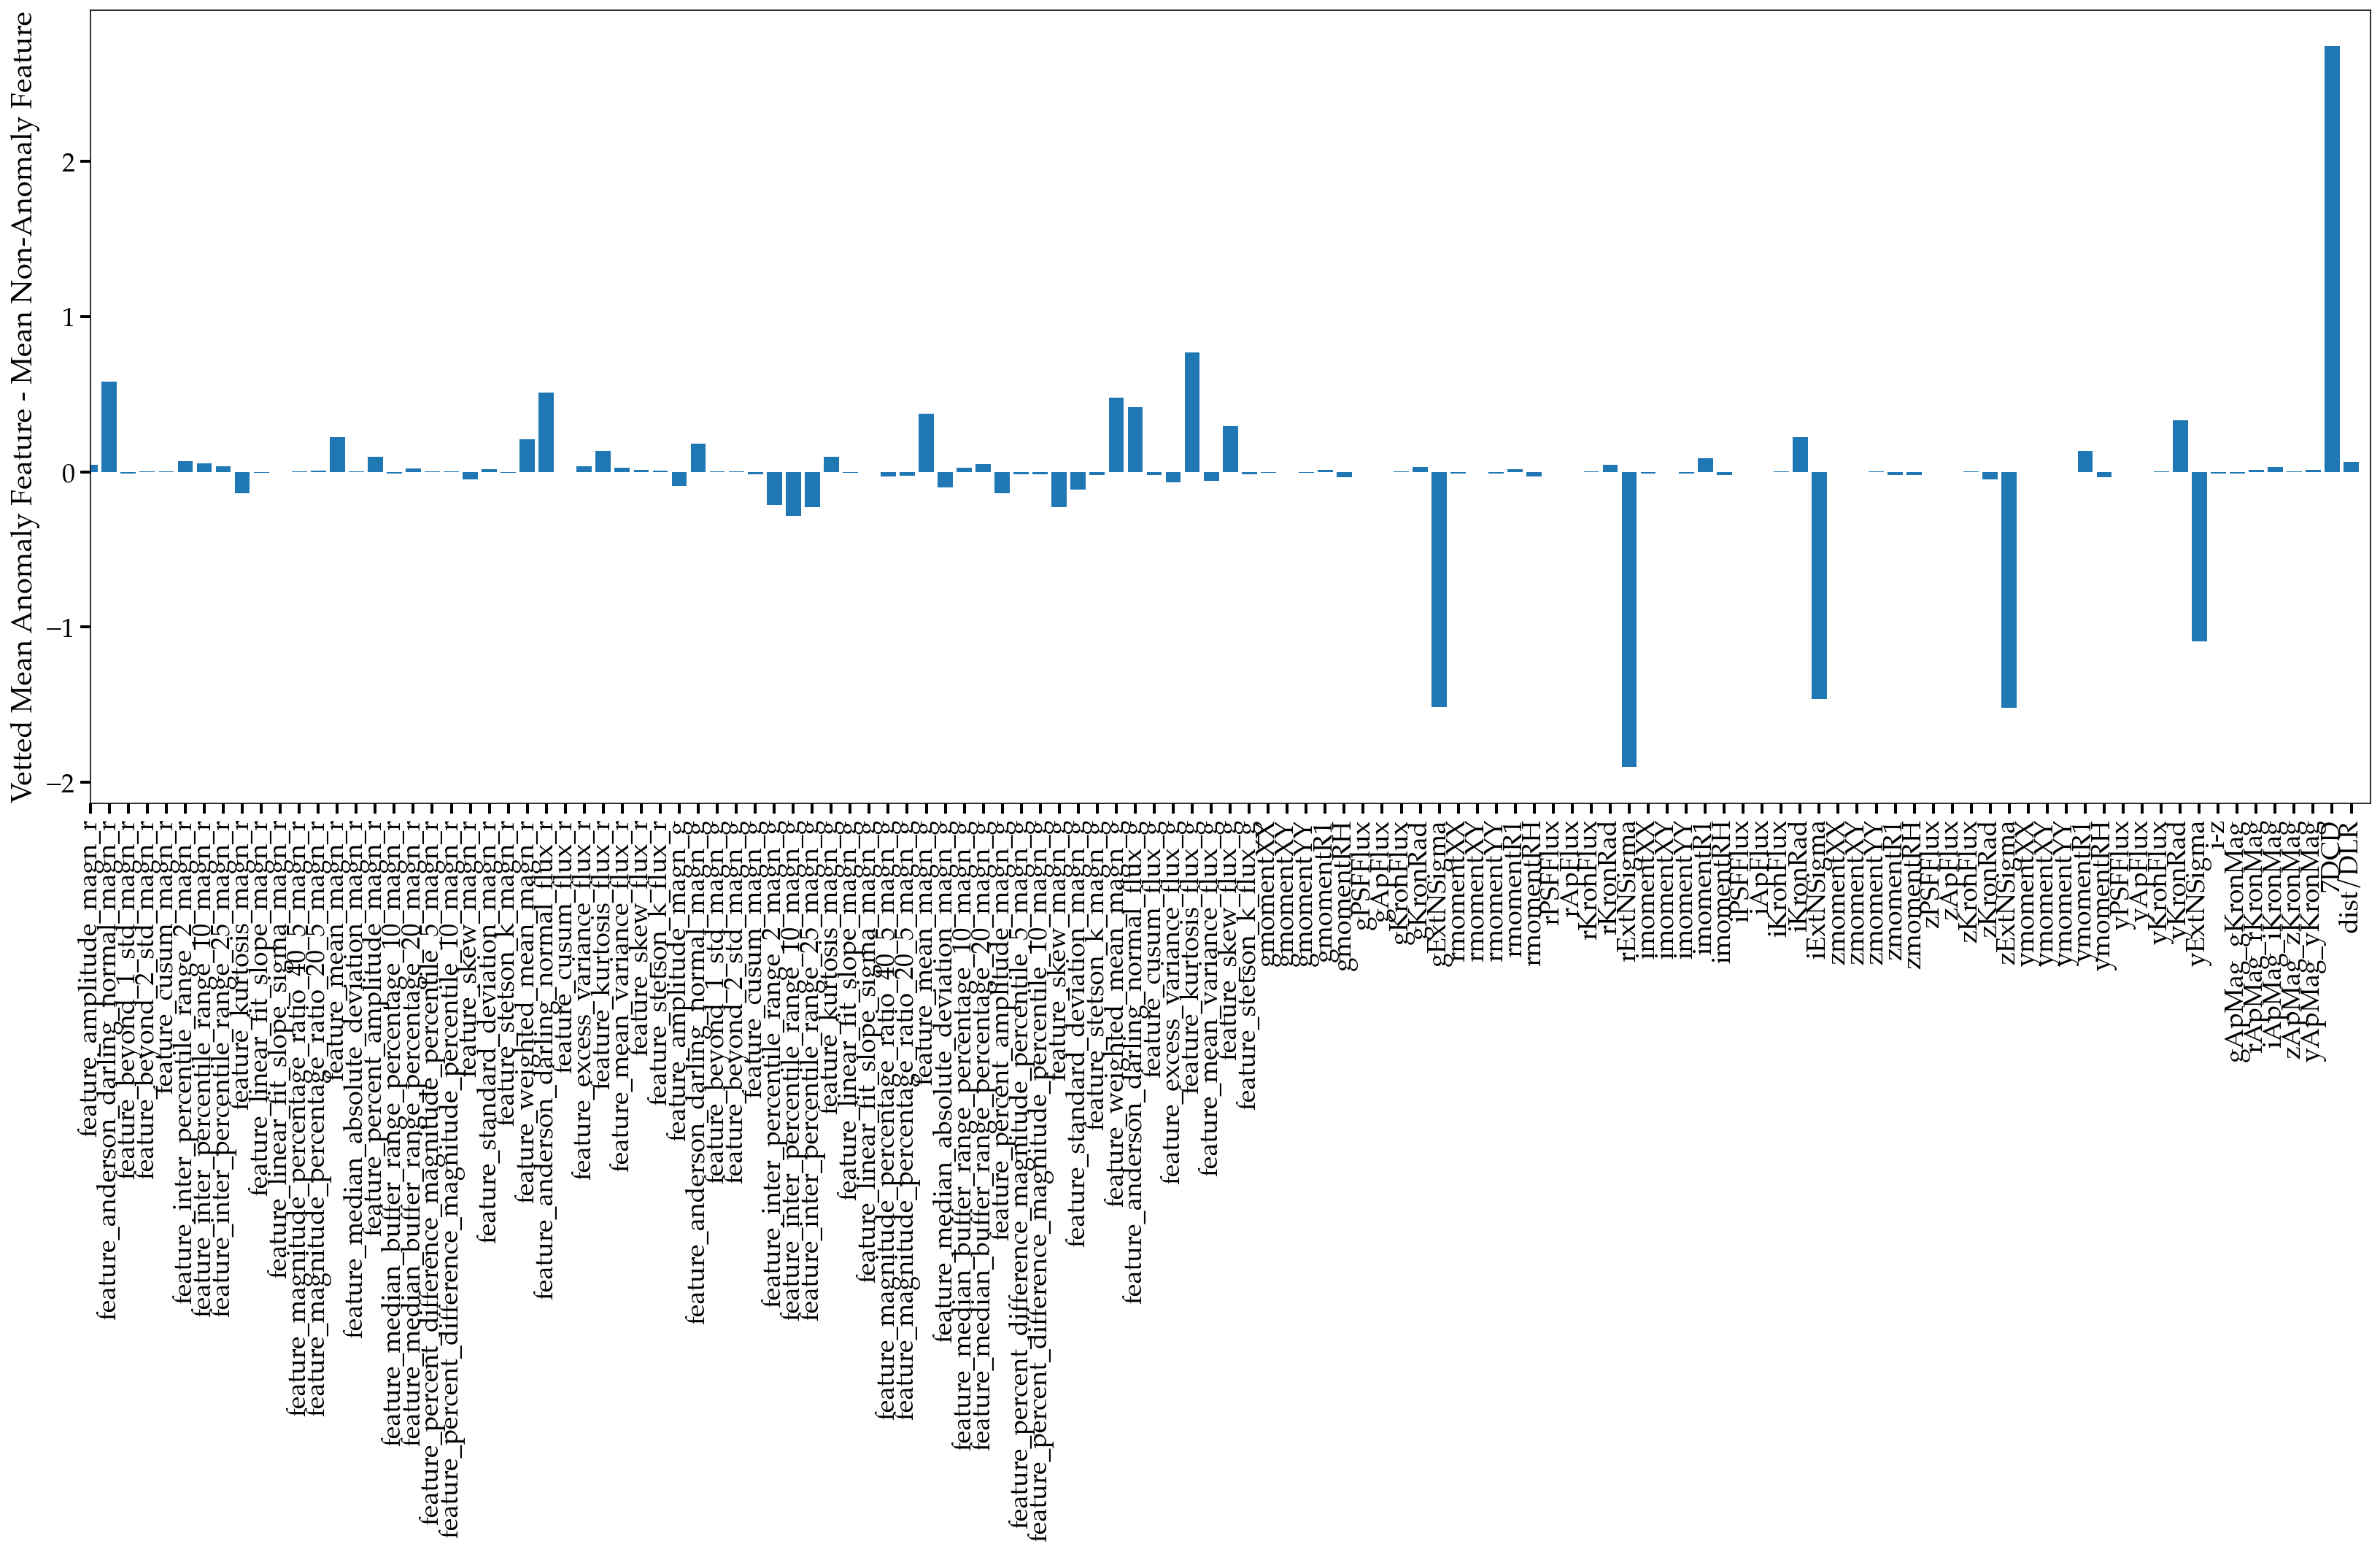

In [90]:
mean_df = pd.DataFrame(mean_arr, columns=anom_df.columns)

# Create a bar chart
plt.figure(figsize=(28, 10))
plt.bar(list(mean_df.columns), np.mean(anom_df).values - np.mean(norm_df).values)


# Add labels and title
# Rotate x-axis tick mark labels by 45 degrees
plt.xlim(0, 120)
plt.xticks(rotation=90)
plt.ylabel('Vetted Mean Anomaly Feature - Mean Non-Anomaly Feature')

In [8]:

correlation_matrix = dataset_bank_tns_df_no_sims.corr(method='spearman', )
correlation_matrix

,feature_amplitude_magn_r,feature_anderson_darling_normal_magn_r,feature_beyond_1_std_magn_r,feature_beyond_2_std_magn_r,feature_cusum_magn_r,feature_inter_percentile_range_2_magn_r,feature_inter_percentile_range_10_magn_r,feature_inter_percentile_range_25_magn_r,feature_kurtosis_magn_r,feature_linear_fit_slope_magn_r,...,yKronRad,yExtNSigma,i-z,gApMag_gKronMag,rApMag_rKronMag,iApMag_iKronMag,zApMag_zKronMag,yApMag_yKronMag,7DCD,dist/DLR
feature_amplitude_magn_r,1.000000,0.533182,-0.009062,0.329706,0.277634,0.996104,0.941733,0.815089,0.033655,0.280771,...,0.174128,0.128919,-0.027755,0.175785,0.181577,0.182425,0.177887,0.178881,0.169795,0.006984
feature_anderson_darling_normal_magn_r,0.533182,1.000000,-0.212521,0.438832,0.175260,0.522159,0.426381,0.319795,0.109157,0.126445,...,0.105339,0.088621,-0.056875,0.113406,0.124446,0.126383,0.122867,0.118551,0.107481,0.015936
feature_beyond_1_std_magn_r,-0.009062,-0.212521,1.000000,-0.384852,0.333737,-0.004866,0.074606,0.250076,-0.579932,0.203493,...,0.018902,0.030124,0.005704,0.014087,0.015222,0.012998,0.017430,0.007468,0.039259,-0.026963
feature_beyond_2_std_magn_r,0.329706,0.438832,-0.384852,1.000000,-0.322302,0.316097,0.130743,-0.052886,0.496188,-0.110844,...,0.020749,0.007280,-0.014506,0.036115,0.044811,0.041003,0.036298,0.034223,0.050529,0.004215
feature_cusum_magn_r,0.277634,0.175260,0.333737,-0.322302,1.000000,0.290987,0.391689,0.621696,-0.697294,0.387526,...,0.128020,0.129317,-0.001805,0.128528,0.129256,0.124344,0.126023,0.119554,0.039389,0.035844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iApMag_iKronMag,0.182425,0.126383,0.012998,0.041003,0.124344,0.187863,0.187229,0.165316,-0.022936,0.191211,...,0.883064,0.831328,0.069417,0.940325,0.956694,1.000000,0.956402,0.923234,0.496482,0.129367
zApMag_zKronMag,0.177887,0.122867,0.017430,0.036298,0.126023,0.183143,0.184389,0.165055,-0.030672,0.196129,...,0.897770,0.848445,-0.023925,0.935360,0.950397,0.956402,1.000000,0.938284,0.520214,0.128536
yApMag_yKronMag,0.178881,0.118551,0.007468,0.034223,0.119554,0.184076,0.188265,0.168154,-0.025225,0.197095,...,0.940425,0.871381,0.044581,0.907858,0.922585,0.923234,0.938284,1.000000,0.528031,0.109492
7DCD,0.169795,0.107481,0.039259,0.050529,0.039389,0.164787,0.153128,0.135185,-0.020361,0.105500,...,0.578275,0.434451,0.070967,0.493958,0.516195,0.496482,0.520214,0.528031,1.000000,0.035404


In [ ]:
correlation_matrix = dataset_bank_tns_df_no_sims.corr(method='spearman', )

fig, ax = plt.subplots(figsize=(17, 15))

cax = ax.matshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

# Add colorbar
cbar = plt.colorbar(cax, fraction=0.045, pad=0.04)
cbar.set_label('Spearman Correlation Coefficient', rotation=270, labelpad=20)

# Display feature names on both axes
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, fontsize=8)
ax.set_yticklabels(correlation_matrix.columns, fontsize=8)

plt.tight_layout(pad=0.02)

# Save or show the plot
#plt.savefig(f'../figures/correlation/dataset_bank_tns_df_{smote_suffix}_correlation_matrix.pdf', 
#            dpi=300, bbox_inches='tight', pad_inches=0.02)
plt.show()